# User Satisfaction Analysis

## Task 1 - User Overview Analysis

Understand the dataset and identify missing values & outliers using visual and quantitative methods.

### tasks:
- Identify the top 10 handsets used by customers.
- Identify the top 3 handset manufacturers.
- Identify the top 5 handsets per top 3 handset manufacturer.
- Provide interpretation and recommendations to marketing teams.


In [1]:

# Import necessary libraries and modules
import os
import sys
import warnings
import pandas as pd

# Add parent directory to path to import local modules
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.connect_db import conn_db 
from scripts.user_overview import UserOverview

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Connecting to a PostgreSQL Database

In [2]:
db = conn_db(
    database='TellCo_db',
    user='postgres',
    password='SH36@jit',
    host='localhost',
    port='5432'
)
db.connect()

Connected to TellCo_db database successfully.


### Fetching Data and Initializing Data Analysis

In [3]:
# Fetch data as a DataFrame
df = db.fetch_data("SELECT * FROM xdr_data;")
db.disconnect()
df.head()

TellCo_db connection closed.


,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (s)                                  150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

 ### Initial Data Analysis Insights: 📊
  - Dataset contains 150,001 records with 55 columns 📝
  - Most columns are numeric (50 float64) with only 5 object (string) columns 🔢
  - Several columns have missing values, particularly: ⚠️
    - TCP DL/UL Retrans. Vol (~60% missing) 📉
    - HTTP DL/UL Bytes (~55% missing) 📊
    - Volume-based time metrics (60-87% missing) ⏱️
  - All application traffic columns (Social Media, Google, Email etc.) have complete data ✅
  - Core user identifiers (MSISDN, IMSI, IMEI) have ~1% missing values 🆔
  - Key metrics like duration, throughput and total bytes are mostly complete 📈


## Identifying Columns with High Percentage of Missing Values

In [5]:

# Calculate the percentage of missing values in each column
missing_values = df.isnull().sum() / len(df)

# Filter the columns where more than 10% of the values are missing
high_missing_values = missing_values[missing_values > 0.1]

print(high_missing_values)

Avg RTT DL (ms)                             0.185525
Avg RTT UL (ms)                             0.185412
TCP DL Retrans. Vol (Bytes)                 0.587636
TCP UL Retrans. Vol (Bytes)                 0.644322
HTTP DL (Bytes)                             0.543156
HTTP UL (Bytes)                             0.545396
Nb of sec with 125000B < Vol DL             0.650249
Nb of sec with 1250B < Vol UL < 6250B       0.619289
Nb of sec with 31250B < Vol DL < 125000B    0.623903
Nb of sec with 37500B < Vol UL              0.868354
Nb of sec with 6250B < Vol DL < 31250B      0.588776
Nb of sec with 6250B < Vol UL < 37500B      0.745615
dtype: float64


# Data Variables Analysis and Column Selection Strategy 📊

### Overview of Dataset Structure and Completeness

Our dataset contains 150,001 entries with 55 columns, consisting of:
- 50 numeric columns (float64)
- 5 categorical columns (object)

### Column Selection Strategy Based on Data Completeness

#### High Completeness (>99% non-null)
- Core identifiers (Bearer Id, IMSI, MSISDN/Number, IMEI)
- Timing data (Start, End, Duration)
- All application traffic metrics (Social Media, Google, Email, etc.)
- Total traffic metrics (Total UL/DL Bytes)
- Throughput percentages (DL/UL TP distributions)
- Device information (Handset Manufacturer, Type)

#### Moderate Completeness (80-99% non-null)
- Network performance metrics (Avg RTT DL/UL)

#### Low Completeness (<80% non-null)
- TCP retransmission volumes (~40% non-null)
- HTTP traffic metrics (~45% non-null)
- Detailed volume-based time metrics (~25-40% non-null)

### Selected Essential Columns

#### Core User/Session Identification (>99% complete)
- `Bearer Id`: Session tracking (99.3% complete)
- `Start`, `End`, `Dur. (s)`: Session timing (100% complete)
- `MSISDN/Number`: User ID (99.3% complete)
- `IMSI`, `IMEI`: Device ID (99.6% complete)

#### Network Performance Metrics
- `Avg Bearer TP DL/UL (kbps)`: Throughput (100% complete)
- `Avg RTT DL/UL (ms)`: Latency (~81% complete)
- `TCP Retrans. Vol`: Retained despite low completeness for QoS analysis

#### Application Usage (100% complete)
- Social Media, Google, Email traffic
- Streaming (YouTube, Netflix)
- Gaming traffic
- Other and Total traffic

#### Device Information (99.6% complete)
- `Handset Manufacturer`
- `Handset Type`

#### Network Quality Indicators (~99.5% complete)
- DL/UL throughput distribution percentages

### Columns Excluded Due to:

1. Low Completeness (<50%):
   - HTTP metrics
   - Volume-based time metrics

2. Redundancy:
   - Millisecond precision timestamps
   - Duplicate duration metrics

### Data Quality Summary
- Core metrics maintain >99% completeness
- Network performance metrics show varying completeness
- Application usage data is complete
- Device information highly reliable

This selection strategy prioritizes data completeness while maintaining comprehensive coverage of key performance and usage metrics.

In [6]:
# Initialize UserOverview class with our DataFrame
user_overv = UserOverview(df)

## Select Essential Columns for Analysis


In [7]:
# select relevent columns
select_data = user_overv.select_essential_columns()
select_data.head()

,Bearer Id,Start,End,Dur. (s),MSISDN/Number,IMSI,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),...,Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Handset Type,DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,1823652.0,3.366496e+10,2.082014e+14,3.552121e+13,23.0,44.0,42.0,...,171744450.0,8814393.0,308879636.0,36749741.0,Samsung,Samsung Galaxy A5 Sm-A520F,100.0,0.0,100.0,0.0
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,1365104.0,3.368185e+10,2.082019e+14,3.579401e+13,16.0,26.0,65.0,...,526904238.0,15055145.0,653384965.0,53800391.0,Samsung,Samsung Galaxy J5 (Sm-J530),100.0,0.0,100.0,0.0
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,1361762.0,3.376063e+10,2.082003e+14,3.528151e+13,6.0,9.0,NaN,...,410692588.0,4215763.0,279807335.0,27883638.0,Samsung,Samsung Galaxy A8 (2018),100.0,0.0,100.0,0.0
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,1321509.0,3.375034e+10,2.082014e+14,3.535661e+13,44.0,44.0,NaN,...,749039933.0,12797283.0,846028530.0,43324218.0,undefined,undefined,100.0,0.0,100.0,0.0
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,1089009.0,3.369980e+10,2.082014e+14,3.540701e+13,6.0,9.0,NaN,...,550709500.0,13910322.0,569138589.0,38542814.0,Samsung,Samsung Sm-G390F,100.0,0.0,100.0,0.0


## Clean and Handle Missing Values


In [8]:
clean_data = user_overv.wrangle()
clean_data.head()

,Bearer Id,Start,End,Dur. (s),MSISDN/Number,IMSI,IMEI,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Avg RTT DL (ms),...,Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),Handset Manufacturer,Handset Type,DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%)
0,1.311448e+19,4/4/2019 12:01,4/25/2019 14:35,1823652.0,3.366496e+10,2.082014e+14,3.552121e+13,23.0,44.0,42.000000,...,171744450.0,8814393.0,308879636.0,36749741.0,Samsung,Samsung Galaxy A5 Sm-A520F,100.0,0.0,100.0,0.0
1,1.311448e+19,4/9/2019 13:04,4/25/2019 8:15,1365104.0,3.368185e+10,2.082019e+14,3.579401e+13,16.0,26.0,65.000000,...,526904238.0,15055145.0,653384965.0,53800391.0,Samsung,Samsung Galaxy J5 (Sm-J530),100.0,0.0,100.0,0.0
2,1.311448e+19,4/9/2019 17:42,4/25/2019 11:58,1361762.0,3.376063e+10,2.082003e+14,3.528151e+13,6.0,9.0,109.795706,...,410692588.0,4215763.0,279807335.0,27883638.0,Samsung,Samsung Galaxy A8 (2018),100.0,0.0,100.0,0.0
3,1.311448e+19,4/10/2019 0:31,4/25/2019 7:36,1321509.0,3.375034e+10,2.082014e+14,3.535661e+13,44.0,44.0,109.795706,...,749039933.0,12797283.0,846028530.0,43324218.0,undefined,undefined,100.0,0.0,100.0,0.0
4,1.311448e+19,4/12/2019 20:10,4/25/2019 10:40,1089009.0,3.369980e+10,2.082014e+14,3.540701e+13,6.0,9.0,109.795706,...,550709500.0,13910322.0,569138589.0,38542814.0,Samsung,Samsung Sm-G390F,100.0,0.0,100.0,0.0


 ## Analyze Top Handset Types and Market Share# 


Handset Type Analysis:
- Most popular handset is Huawei B528S-23A with 20324 users
- Top 3 handsets account for 25.8% of all users


,Count,Market Share %
Handset Type,,
Huawei B528S-23A,20324,13.55
Apple iPhone 6S (A1688),9419,6.28
Apple iPhone 6 (A1586),9023,6.02
undefined,8987,5.99
Apple iPhone 7 (A1778),6326,4.22
Apple iPhone Se (A1723),5187,3.46
Apple iPhone 8 (A1905),4993,3.33
Apple iPhone Xr (A2105),4568,3.05
Samsung Galaxy S8 (Sm-G950F),4520,3.01


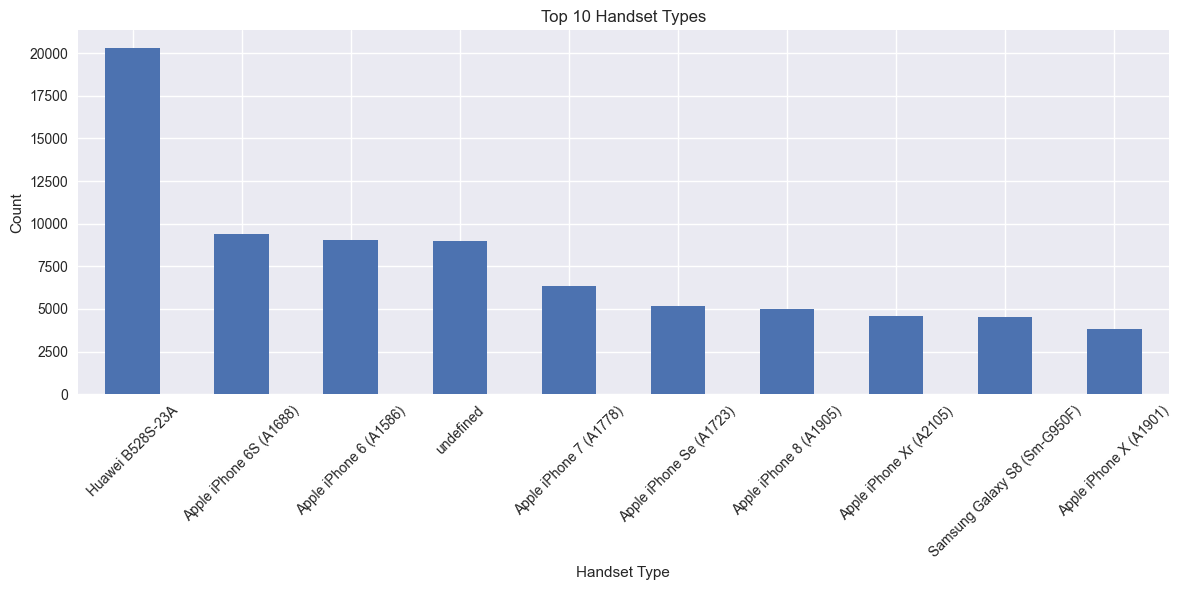

In [9]:
user_overv.get_top_handsets()

 ### Key Insights from Handset Analysis: 📱
 - 📊 Huawei B528S-23A dominates with 13.55% market share, significantly ahead of other models
 - 🍎 Apple iPhones (6S, 6, 7, SE, 8, XR, X) collectively hold ~29% of the market
 - ❓ High number of 'undefined' devices (6%) suggests potential data quality issues
 - 📱 Samsung has only one model (Galaxy S8) in top 10 with 3% share
 - 🏆 Top 3 handsets account for over 25% of all devices
 - 💰 Premium smartphones (iPhone X, Galaxy S8) have lower market share than mid-range models


## Analyze Top Manufacturers and Market Share



Manufacturer Analysis:
- Market leader is Apple with 40.1% market share
- Top 3 manufacturers control 90.3% of the market


,Count,Market Share %
Handset Manufacturer,,
Apple,60137,40.09
Samsung,40839,27.23
Huawei,34423,22.95


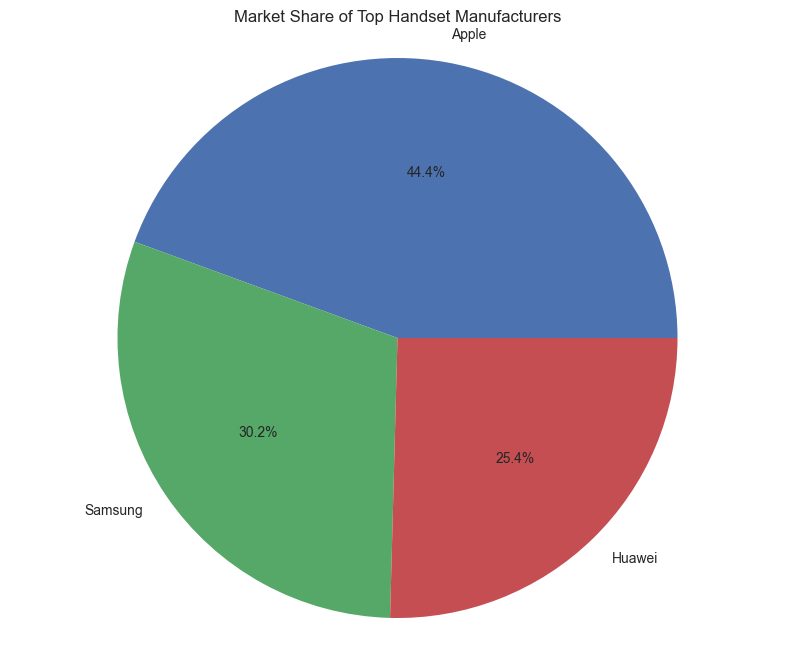

In [10]:
user_overv.get_top_manufacturers()

 ### Key Insights from Manufacturer Analysis: 🏢
 - 🍎 Apple leads with 40.1% market share, showing strong brand loyalty
 - 🌟 Samsung holds second place with 27.2% of the market
 - 📱 Huawei captures 23% market share, making it a significant player
 - 🏆 Top 3 manufacturers control over 90% of the market, indicating high concentration
 - 📊 The significant gap between Apple and others suggests premium positioning success
 - 💼 Market structure shows oligopolistic competition with 3 dominant players


 ## Analyze Top Handsets per Manufacturer


Apple Analysis:
- Most popular model: Apple iPhone 6S (A1688)
- Top model market share: 15.7%

Samsung Analysis:
- Most popular model: Samsung Galaxy S8 (Sm-G950F)
- Top model market share: 11.1%

Huawei Analysis:
- Most popular model: Huawei B528S-23A
- Top model market share: 57.4%


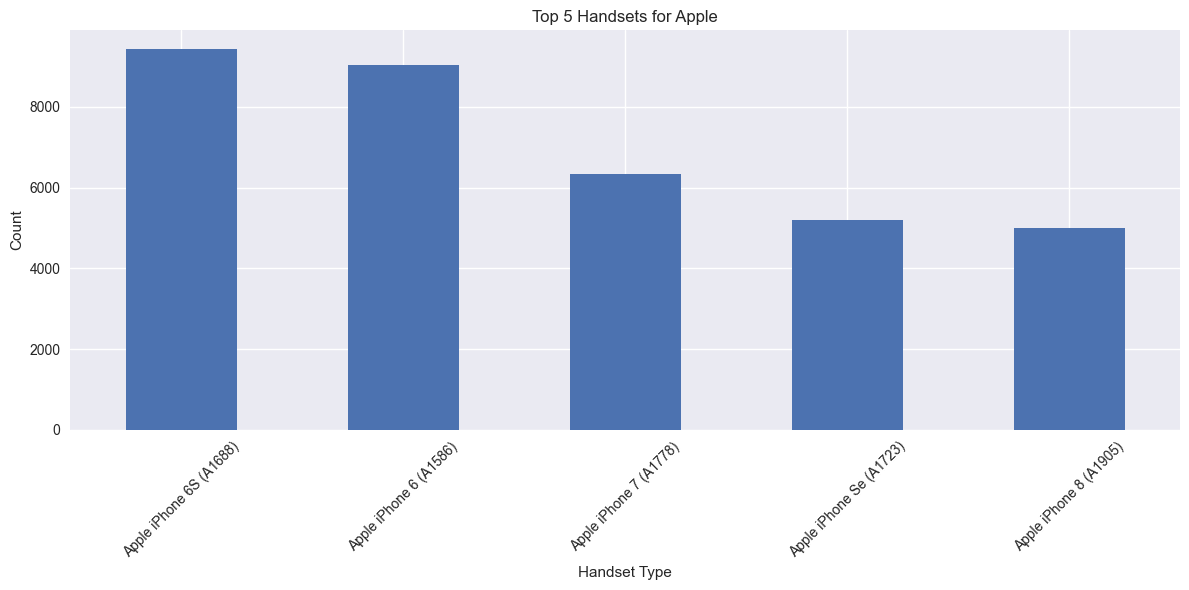

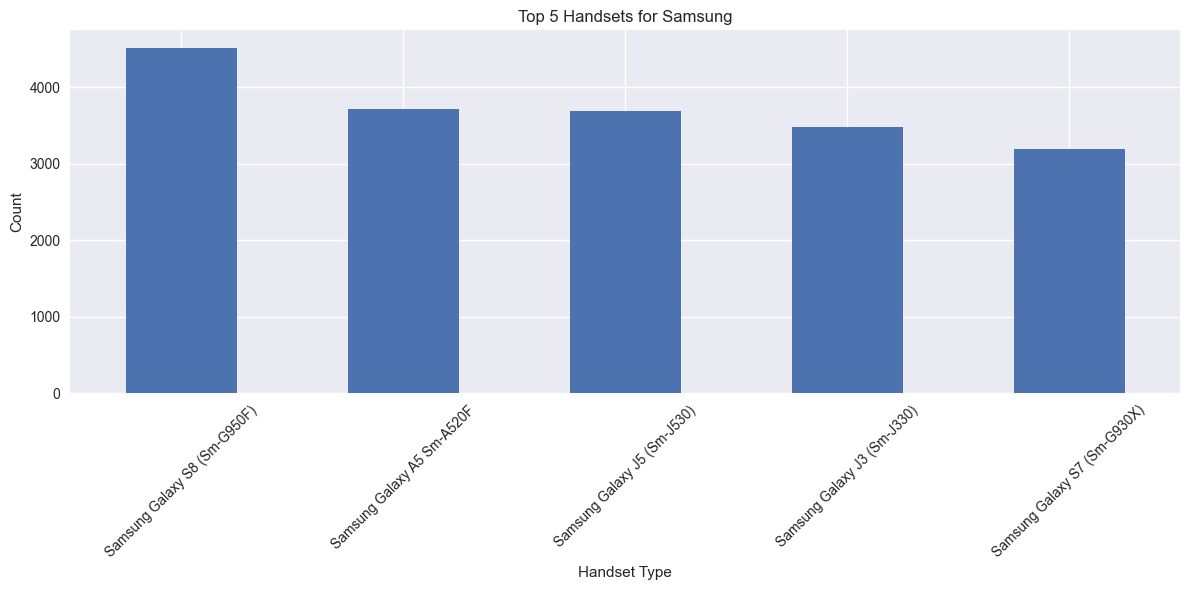

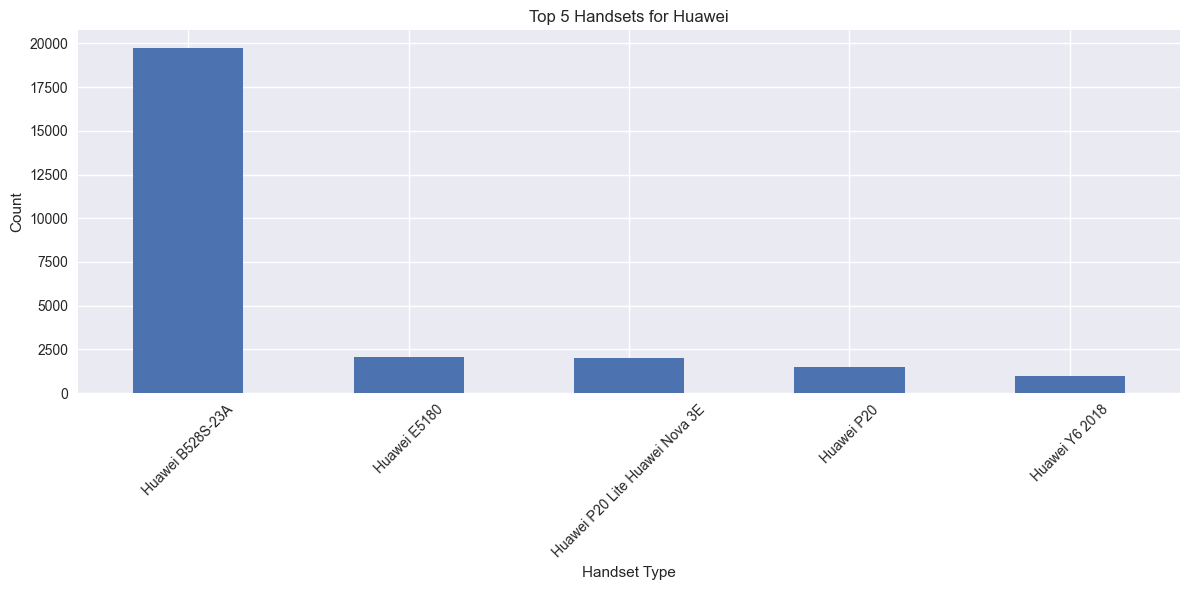

In [11]:
user_overv.get_top_handsets_per_manufacturer()

 ### Key Insights from Manufacturer-Specific Analysis: 📱
 - 🏠 Huawei's B528S-23A router dominates their portfolio with 57.4% share, suggesting strong focus on home internet solutions
 - 📱 Apple shows more balanced distribution with iPhone 6S leading at 15.7%, indicating diverse model adoption
 - 🌟 Samsung's Galaxy S8 leads at 11.1%, reflecting balanced mid-to-high end market presence
 - 📊 Huawei's high concentration in one model vs Apple/Samsung's distributed shares shows different market strategies
 - 💡 Legacy models (iPhone 6S, Galaxy S8) leading suggests longer replacement cycles
 - 🔄 Different market approaches: Huawei (focused), Apple/Samsung (diversified portfolio)


## Analyze User Behavior and Application Usage


Application Usage Analysis:
- Social Media: 0.2% of total data usage
- Google: 0.9% of total data usage
- Email: 0.2% of total data usage
- Youtube: 2.5% of total data usage
- Netflix: 2.5% of total data usage
- Gaming: 46.9% of total data usage
- Other: 46.8% of total data usage


,MSISDN/Number,Bearer Id,Dur. (s),Dur. (min),Total DL (MB),Total UL (MB),Social Media DL (MB),Social Media UL (MB),Google DL (MB),Google UL (MB),...,Gaming UL (MB),Other DL (MB),Other UL (MB),Social Media Total (MB),Google Total (MB),Email Total (MB),Youtube Total (MB),Netflix Total (MB),Gaming Total (MB),Other Total (MB)
0,3.360100e+10,1,1.167200e+05,1.945333e+03,803.601709,34.382923,2.104286,0.024444,3.182528,1.003153,...,1.304176,359.627714,9.034998,2.128730,4.185681,1.269686,20.622776,25.921803,774.820958,368.662712
1,3.360100e+10,1,1.812300e+05,3.020500e+03,115.161118,34.431895,2.478168,0.059144,4.003236,1.084486,...,14.033108,266.606999,2.052660,2.537313,5.087722,3.154546,11.856292,10.701907,114.202574,268.659659
2,3.360100e+10,1,1.349690e+05,2.249483e+03,530.872024,37.485905,3.002171,0.045413,3.188594,0.095027,...,9.307125,472.151280,6.301089,3.047584,3.283621,3.056889,20.345278,18.457317,513.866151,478.452370
3,3.360101e+10,1,4.987800e+04,8.313000e+02,383.370564,19.385839,0.239820,0.027490,5.662694,3.567436,...,2.909939,24.078370,9.566976,0.267309,9.230130,2.178831,6.654092,1.852123,373.006942,33.645346
4,3.360101e+10,2,3.710400e+04,6.184000e+02,1299.982469,89.912917,2.728682,0.048935,13.092678,4.549931,...,5.547263,741.618836,25.902530,2.777617,17.642609,3.152341,39.608957,46.922421,1253.888912,767.521366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,2.349800e+03,423.979847,34.076922,0.421728,0.053744,1.404196,3.773974,...,8.948399,195.156167,6.178894,0.475472,5.178170,2.397630,18.931934,8.135853,416.758816,201.335061
106853,4.188282e+10,1066,7.255100e+07,1.209183e+06,464800.153500,42311.118592,1847.949086,34.429838,5729.620425,2136.835522,...,8328.501064,421455.655725,8630.854323,1882.378924,7866.455946,2288.704332,23213.125139,23130.008817,440099.744611,430086.510048
106854,3.197021e+12,1,8.773850e+05,1.462308e+04,185.802513,35.568156,0.637623,0.044468,8.175639,1.779443,...,12.860425,446.012592,2.716420,0.682091,9.955082,1.450320,11.405854,25.360394,169.800508,448.729012
106855,3.370000e+14,1,2.530300e+05,4.217167e+03,514.636025,54.028358,0.473344,0.024060,7.834947,1.540260,...,8.472112,137.666757,4.610426,0.497404,9.375207,3.164846,35.033169,29.473345,486.509986,142.277183


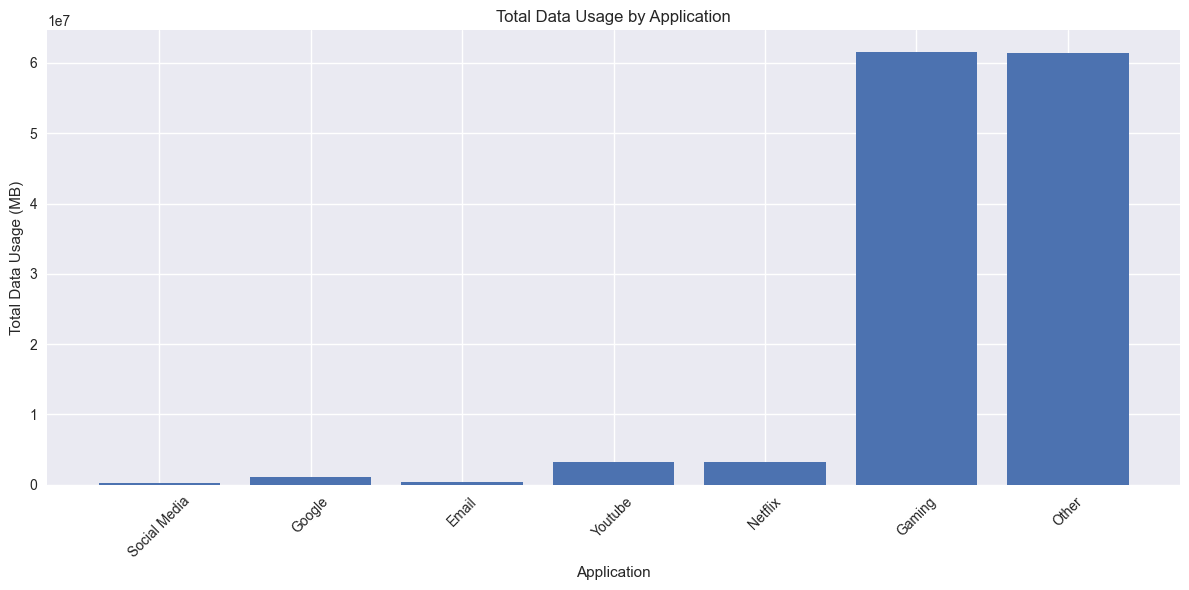

In [12]:
user_overv.aggregate_user_behavior()

 ### Key Insights from Application Usage Analysis: 📱
 - 🎮 Gaming and Other categories dominate data consumption, suggesting high entertainment usage
 - 📊 Social Media shows relatively low data usage despite likely high engagement frequency
 - 🎥 Video streaming (YouTube, Netflix) shows moderate usage levels
 - 📧 Email and Google services show minimal data consumption, indicating mostly text-based usage
 - 💡 The high "Other" category suggests significant uncategorized traffic that needs investigation
 - 📈 Data usage patterns indicate entertainment-focused user behavior over productivity applications


## Analyze User Deciles


User Decile Analysis:
- Top 10% of users (D10) average 8077.2 minutes
- Bottom 10% of users (D1) average 334.5 minutes


Total DL (MB) Total UL (MB)   Dur. (min)                    
                          sum           sum         mean       median  count
Duration Decile                                                             
D1               4.758684e+06  4.286146e+05   334.546995   337.841667  10688
D2               5.344489e+06  4.818992e+05   670.483603   654.833333  10684
D3               5.715038e+06  5.185600e+05  1185.759992  1190.683333  10744
D4               5.277216e+06  4.774841e+05  1439.479810  1439.983333  12082
D5               4.498443e+06  4.074308e+05  1571.184790  1572.516667   9231
D6               5.619531e+06  5.085903e+05  1957.208726  1960.450000  10685
D7               5.385192e+06  4.822676e+05  2463.051956  2460.533333  10686
D8               6.837816e+06  6.220475e+05  2915.651731  2879.983333  10686
D9               8.140534e+06  7.346056e+05  3878.873946  3886.016667  10685
D10              1.346075e+07  1.220975e+06  8077.248837  6162.950000  10686

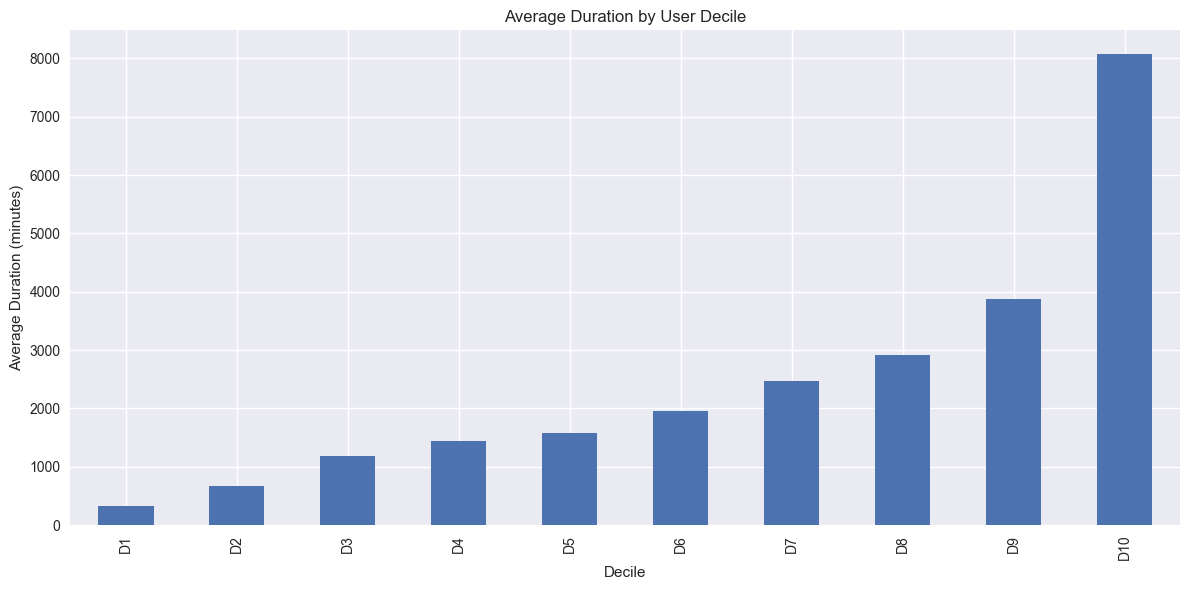

In [13]:
user_overv.get_user_deciles()

### User Decile Analysis:
 - Top 10% of users (D10) average 8077.2 minutes
 - Bottom 10% of users (D1) average 334.5 minutes

 This analysis highlights significant disparities in user engagement, with the top decile exhibiting over 24 times the average duration of the bottom decile. Such insights can inform targeted strategies for user retention and engagement.


## Compute Basic Metrics

,MSISDN/Number,Bearer Id,Dur. (s),Dur. (min),Total DL (MB),Total UL (MB),Social Media DL (MB),Social Media UL (MB),Google DL (MB),Google UL (MB),...,Gaming UL (MB),Other DL (MB),Other UL (MB),Social Media Total (MB),Google Total (MB),Email Total (MB),Youtube Total (MB),Netflix Total (MB),Gaming Total (MB),Other Total (MB)
count,1.068570e+05,106857.000000,1.068570e+05,1.068570e+05,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,...,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000
mean,4.511471e+10,1.403755,1.468447e+05,2.447412e+03,608.642372,55.049973,2.403442,0.044082,7.698674,2.753143,...,11.095883,563.737683,11.064291,2.447524,10.451818,3.024316,30.313389,30.293474,576.097534,574.801974
std,2.889410e+12,3.355032,2.894646e+05,4.824410e+03,1487.542801,133.666179,5.925860,0.110279,18.435202,6.849457,...,26.772189,1355.348002,27.645796,6.032020,25.086803,7.306422,73.770409,73.524648,1411.154282,1381.934994
min,3.360100e+10,1.000000,7.142000e+03,1.190333e+02,8.418161,2.734081,0.000011,0.000000,0.000197,0.000003,...,0.000056,0.003138,0.000149,0.001491,0.038462,0.017334,0.075248,0.176019,0.292166,0.142140
25%,3.365088e+10,1.000000,7.130900e+04,1.188483e+03,300.245464,34.709489,1.121439,0.020600,3.626733,1.278980,...,5.193666,263.957078,5.208228,1.155194,5.667384,1.596912,17.768334,17.696445,274.721755,272.335894
50%,3.366365e+10,1.000000,1.027410e+05,1.712350e+03,543.948418,44.626565,2.160092,0.039635,6.920617,2.473203,...,9.962660,505.399603,9.896198,2.197085,9.142099,2.670149,25.558856,25.481747,517.225372,514.831635
75%,3.368344e+10,2.000000,1.727990e+05,2.879983e+03,769.968143,62.688601,3.115934,0.057144,9.948030,3.570549,...,14.382199,729.910858,14.331369,3.154301,12.602763,3.668981,36.171233,36.217895,741.302053,739.497114
max,8.823971e+14,1066.000000,7.255100e+07,1.209183e+06,464800.153500,42311.118592,1847.949086,34.429838,5729.620425,2136.835522,...,8328.501064,421455.655725,8630.854323,1882.378924,7866.455946,2288.704332,23213.125139,23130.008817,440099.744611,430086.510048


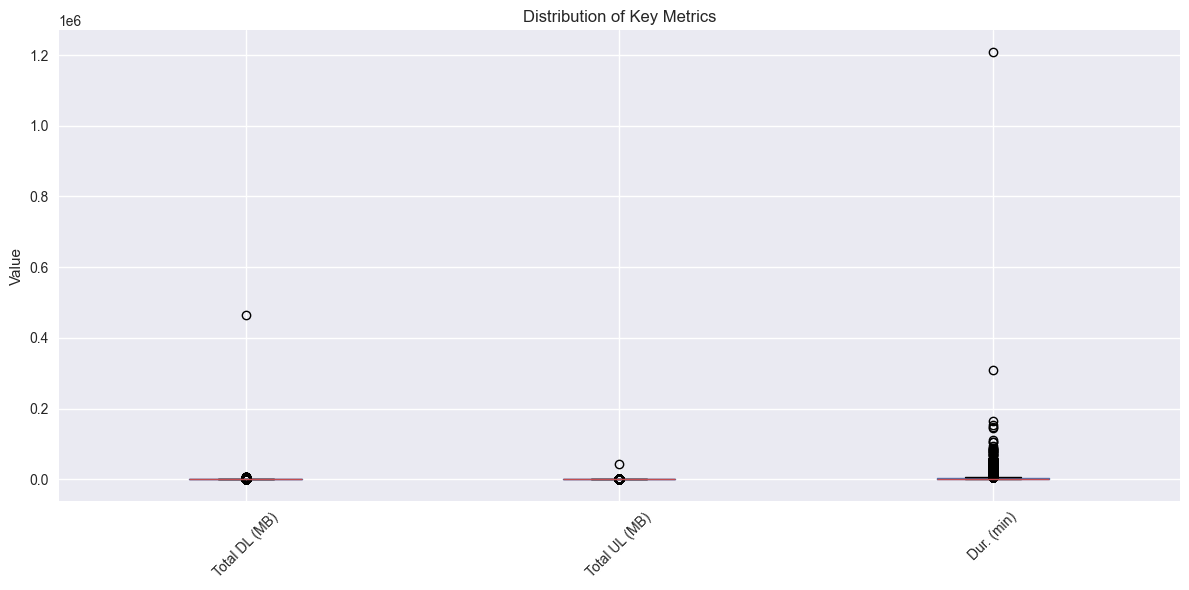

In [14]:
user_overv.compute_basic_metrics()


### Insights about the Distribution 📊
 - The box plot reveals the distribution of Total Data Download (MB) 📥, Total Data Upload (MB) 📤, and Duration (min) ⏳.
 - Significant outliers in Total DL and Total UL indicate a small number of users consume disproportionately high data ⚠️.
 - The duration metric shows a more consistent user engagement pattern, with fewer extreme values 📈.
 return stats


## Compute and visualize correlation matrix for application data


Correlation Analysis:
- Strong correlation (0.97) between Social and Youtube
- Strong correlation (0.97) between Google and Social
- Strong correlation (0.98) between Google and Youtube
- Strong correlation (0.98) between Google and Netflix
- Strong correlation (0.97) between Google and Other
- Strong correlation (0.97) between Email and Social
- Strong correlation (0.97) between Email and Google
- Strong correlation (0.98) between Email and Youtube
- Strong correlation (0.98) between Email and Netflix
- Strong correlation (0.97) between Email and Gaming
- Strong correlation (0.97) between Email and Other
- Strong correlation (0.97) between Netflix and Social
- Strong correlation (0.98) between Netflix and Youtube
- Strong correlation (0.97) between Netflix and Other
- Strong correlation (0.96) between Gaming and Social
- Strong correlation (0.97) between Gaming and Google
- Strong correlation (0.97) between Gaming and Youtube
- Strong correlation (0.97) between Gaming and Netflix
- S

,Social Media Total (MB),Google Total (MB),Email Total (MB),Youtube Total (MB),Netflix Total (MB),Gaming Total (MB),Other Total (MB)
Social Media Total (MB),1.000000,0.968997,0.967901,0.971348,0.971320,0.962460,0.961808
Google Total (MB),0.968997,1.000000,0.974074,0.977704,0.977460,0.968683,0.967954
Email Total (MB),0.967901,0.974074,1.000000,0.976294,0.976301,0.967100,0.966628
Youtube Total (MB),0.971348,0.977704,0.976294,1.000000,0.980116,0.970937,0.970384
Netflix Total (MB),0.971320,0.977460,0.976301,0.980116,1.000000,0.970874,0.969937
Gaming Total (MB),0.962460,0.968683,0.967100,0.970937,0.970874,1.000000,0.961084
Other Total (MB),0.961808,0.967954,0.966628,0.970384,0.969937,0.961084,1.000000


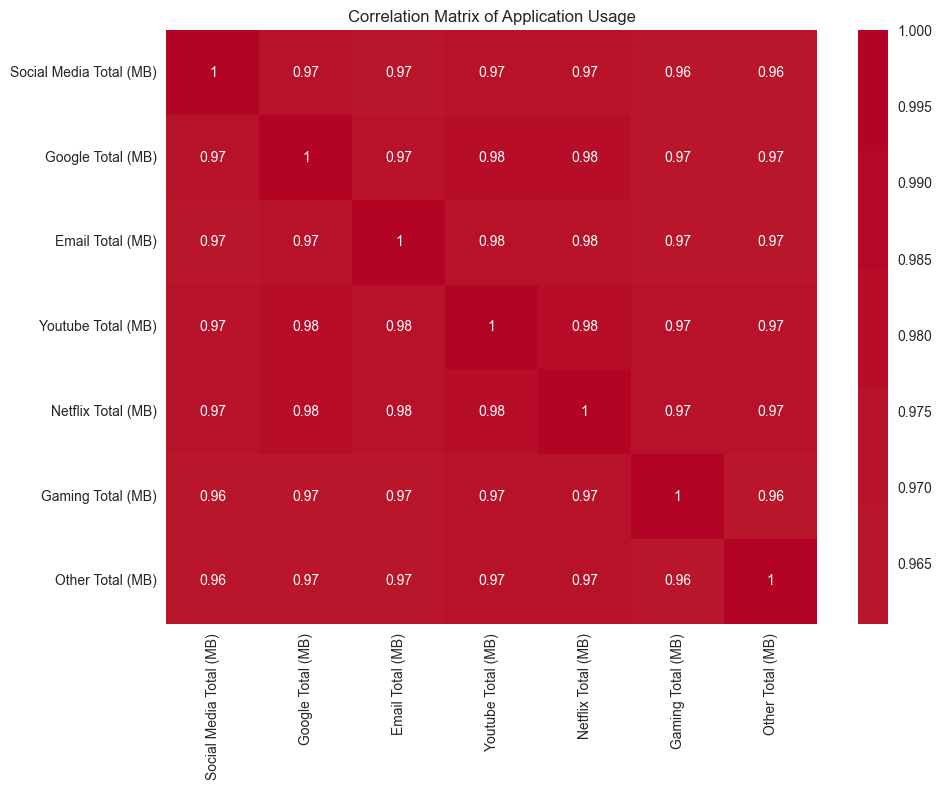

In [15]:
user_overv.compute_correlation_matrix()

### Correlation Analysis:
 Strong correlations among application usage indicate significant relationships
 These correlations can inform targeted strategies for user engagement.




PCA Analysis:
- First component explains 97.5% of variance
- Total explained variance: 98.0%


{'transformed_data': array([[-0.28083287, -0.17242718],
        [-0.47131561,  0.00990404],
        [-0.22418865, -0.03672813],
        ...,
        [-0.4647994 ,  0.14546738],
        [-0.25257453, -0.16386319],
        [-0.24261732,  0.12096954]], shape=(106857, 2)),
 'explained_variance_ratio': array([0.9746762 , 0.00557895]),
 'components':      Social Media Total (MB)  Google Total (MB)  Email Total (MB)  \
 PC1                 0.376915           0.378642          0.378277   
 PC2                -0.180450          -0.026948         -0.025188   
 
      Youtube Total (MB)  Netflix Total (MB)  Gaming Total (MB)  \
 PC1            0.379304            0.379261           0.376764   
 PC2           -0.014366           -0.031126          -0.540877   
 
      Other Total (MB)  
 PC1          0.376578  
 PC2          0.819972  ,
 'cumulative_variance': array([0.9746762 , 0.98025514])}

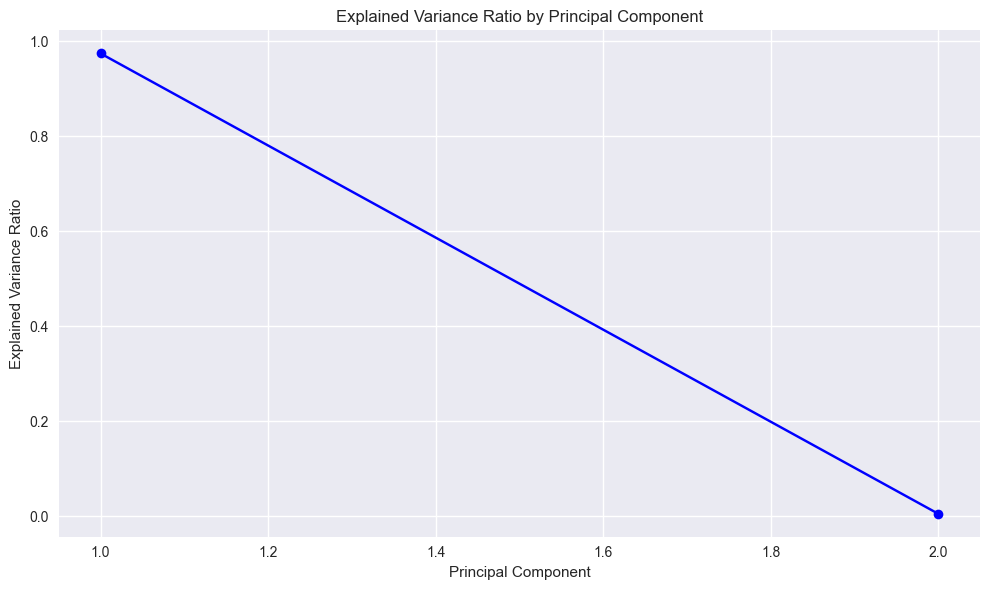

In [16]:
user_overv.perform_pca()

In [1]:
user_overv.get_user_overview()

NameError: name 'user_overv' is not defined